In [19]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")
        
        with open(filename, "r") as f:
            if cpp:
                N = []
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("N:"):
                        N_line = line.split(": ")[1].strip()
                        N.append(np.array([float(x) for x in N_line.split()]))
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                N_index = lines.index("N\n") + 1
                N = []
                while True:
                    try:
                        N.append(float(lines[N_index].strip()))
                        N_index += 1
                    except ValueError:
                        break
        
        t_values.append(t)
        N_values.append(N)
    
    t_array = np.array(t_values)
    N_array = np.array(N_values)
    
    if not cpp:
        N_array = N_array.reshape(len(N_array), 1, -1)

    return t_array, N_array


# Load C++ data
file_dir_cpp = "./OutputC"
t_array_cpp, N_array_cpp = load_data(file_dir_cpp, "PlotFile_", 175)

# Load Matlab data
file_dir_matlab = "./OutputM"
t_array_matlab, N_array_matlab = load_data(file_dir_matlab, "PlotFile_", 175, cpp=False)

# Apply log10 to the arrays
t_log_array_cpp = np.log10(t_array_cpp)
N_log_array_cpp = np.log10(N_array_cpp)
t_log_array_matlab = np.log10(t_array_matlab)
N_log_array_matlab = np.log10(N_array_matlab)

# Perform the RMS error calculation for each time step
RMS_array = np.zeros((175,))
for i in range(1, 175):
    # Get the reference and approximation calculations for this time step
    R = N_array_matlab[i, :]
    A = N_array_cpp[i - 1, :].reshape(N_array_matlab.shape[1], -1)

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)
    StepRes = np.sum(Res)

    # Calculate the RMS error
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))

    # Add the RMS error to the array
    RMS_array[i - 1] = RMS

# Find the maximum RMS error and the time step at which it occurs
max_RMS_error = np.max(RMS_array)
max_error_idx = np.unravel_index(np.argmax(RMS_array, axis=None), RMS_array.shape)
max_error_time = t_array_matlab[max_error_idx[0]]

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the 'colors' variable using hls_palette
num_colors = N_log_array_cpp.shape[2]
colors = sns.color_palette("hls", num_colors)

offset = 0.1  # an arbitrary small offset
for i in range(N_log_array_cpp.shape[2]):
    ax.plot(t_log_array_cpp[1:], N_log_array_cpp[1:, :, i] + offset, c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Plot C++ data with straight lines
#for i in range(N_log_array_cpp.shape[2]):
#    ax.plot(t_log_array_cpp[1:], N_log_array_cpp[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Plot Matlab data with dashed lines
for i in range(N_log_array_matlab.shape[2]):
    ax.plot(t_log_array_matlab[1:], N_log_array_matlab[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2, linestyle='--')

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title("Population vs Time; EA vs BE; TolC = 1.0e-04; dtgrow = 1.03", fontsize=18, y=1.05)

# Create a custom legend with visual distinctions
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', lw=2, linestyle='--')]

ax.legend(custom_lines, ['C++', 'Matlab'], loc='lower right')

# Add RMS error box with a smaller size
ax.text(0.50, 0.05, f"Max RMS Error: {max_RMS_error:.6f}", transform=ax.transAxes, fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.9, pad=3))

#plt.savefig("Pop_vs_time_Intermidiate_Model_1.eps", dpi=300, bbox_inches="tight")

plt.show()



FileNotFoundError: [Errno 2] No such file or directory: './OutputC/PlotFile_91'

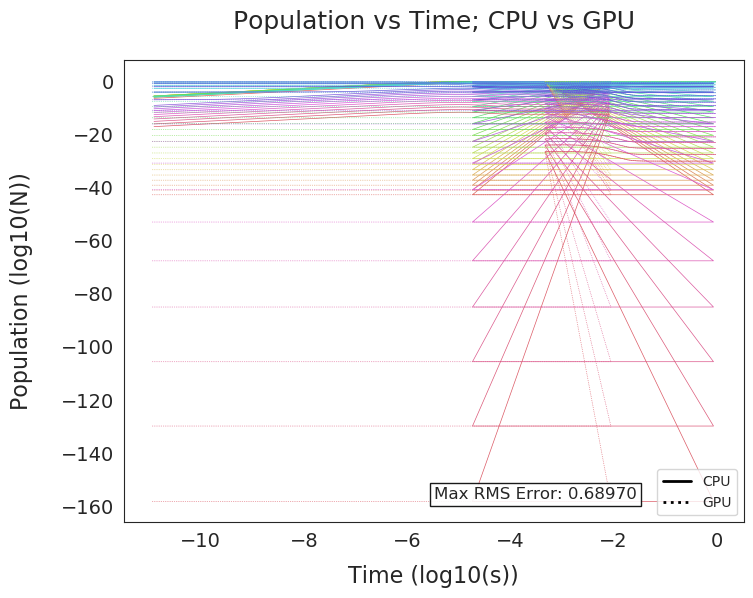

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    for i in range(num_files):
        filename = os.path.join(file_dir, f"PlotFile_{i}")
        
        with open(filename, "r") as f:
            N = []
            for line in f:
                if line.startswith("t:"):
                    t = float(line.split(": ")[1])
                elif line.startswith("N:"):
                    N_line = line.split(": ")[1].strip()
                    N.append(np.array([float(x) for x in N_line.split()]))
        
        t_values.append(t)
        N_values.append(N)
    
    t_array = np.array(t_values)
    N_array = np.array(N_values)

    return t_array, N_array

# Load first C++ data
file_dir_cpp = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/3_6_CPU"
t_array_cpp, N_array_cpp = load_data(file_dir_cpp, "PlotFile_", 250)

# Load second C++ data
file_dir_cpp_2 = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/3_6_GPU"
t_array_cpp_2, N_array_cpp_2 = load_data(file_dir_cpp_2, "PlotFile_", 250)

# Apply log10 to the arrays
t_log_array_cpp = np.log10(t_array_cpp)
N_log_array_cpp = np.log10(N_array_cpp)

t_log_array_cpp_2 = np.log10(t_array_cpp_2)
N_log_array_cpp_2 = np.log10(N_array_cpp_2)

## Perform the RMS error calculation for each time step
RMS_array = np.zeros((250,))
for i in range(0, 250): # change here
    # Get the reference and approximation calculations for this time step
    R = N_array_cpp[i, :]
    A = N_array_cpp_2[i, :].reshape(N_array_cpp.shape[1], -1)

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)
    StepRes = np.sum(Res)

    # Calculate the RMS error
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))

    # Add the RMS error to the array
    RMS_array[i] = RMS # and here

# Find the maximum RMS error and the time step at which it occurs
max_RMS_error = np.max(RMS_array)
max_error_idx = np.unravel_index(np.argmax(RMS_array, axis=None), RMS_array.shape)
max_error_time = t_array_cpp[max_error_idx[0]]

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the 'colors' variable using hls_palette
num_colors = N_log_array_cpp.shape[2]
colors = sns.color_palette("hls", num_colors)

# Plot first C++ data with straight lines
for i in range(N_log_array_cpp.shape[2]):
    ax.plot(t_log_array_cpp[1:], N_log_array_cpp[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Plot second C++ data with dotted lines
for i in range(N_log_array_cpp_2.shape[2]):
    ax.plot(t_log_array_cpp_2[1:], N_log_array_cpp_2[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2, linestyle=':')

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title("Population vs Time; CPU vs GPU", fontsize=18, y=1.05)

# Create a custom legend with visual distinctions
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', lw=2, linestyle=':')]

ax.legend(custom_lines, ['CPU', 'GPU'], loc='lower right')

# Add RMS error box with a smaller size
ax.text(0.50, 0.05, f"Max RMS Error: {max_RMS_error:.5f}", transform=ax.transAxes, fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.9, pad=3))

plt.show()


In [3]:
# Perform the RMS error calculation for each time step
RMS_array_cpp = np.zeros((249,))
RMS_array_matlab = np.zeros((250,))
for i in range(1, 250):
    # Get the reference and approximation calculations for this time step
    R = N_array_matlab[i, :]
    A = N_array_cpp[i - 1, :].reshape(N_array_matlab.shape[1], -1)

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)

    # Calculate the RMS error for C++ data
    RMS_cpp = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))
    RMS_array_cpp[i - 1] = RMS_cpp

    # Calculate the RMS error for Matlab data
    RMS_matlab = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))
    RMS_array_matlab[i - 1] = RMS_matlab

# Find the maximum RMS error and the time step at which it occurs for each case
max_RMS_error_cpp = np.max(RMS_array_cpp)
max_error_idx_cpp = np.unravel_index(np.argmax(RMS_array_cpp, axis=None), RMS_array_cpp.shape)
max_error_time_cpp = t_array_cpp[max_error_idx_cpp[0]]

max_RMS_error_matlab = np.max(RMS_array_matlab)
max_error_idx_matlab = np.unravel_index(np.argmax(RMS_array_matlab, axis=None), RMS_array_matlab.shape)
max_error_time_matlab = t_array_matlab[max_error_idx_matlab[0]]

print("C++ Data:")
print("Max RMS Error:", max_RMS_error_cpp)
print("Time step at which it occurs:", max_error_time_cpp)

print("\nMatlab Data:")
print("Max RMS Error:", max_RMS_error_matlab)
print("Time step at which it occurs:", max_error_time_matlab)


IndexError: index 99 is out of bounds for axis 0 with size 99

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")

        with open(filename, "r") as f:
            if cpp:
                N = []
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("N:"):
                        N_line = line.split(": ")[1].strip()
                        N.append(np.array([float(x) for x in N_line.split()]))
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                N_index = lines.index("N\n") + 1
                N = []
                while True:
                    try:
                        N.append(float(lines[N_index].strip()))
                        N_index += 1
                    except ValueError:
                        break

        t_values.append(t)
        N_values.append(N)

    t_array = np.array(t_values)
    N_array = np.array(N_values)

    if not cpp:
        N_array = N_array.reshape(len(N_array), 1, -1)

    return t_array, N_array

# Load C++ data
file_dir_cpp = "./OutputC"
t_array_cpp, N_array_cpp = load_data(file_dir_cpp, "PlotFile_", 249)

# Load Matlab data
file_dir_matlab = "./OutputM"
t_array_matlab, N_array_matlab = load_data(file_dir_matlab, "PlotFile_", 250, cpp=False)

# Perform the RMS error calculation for each time step
RMS_array = np.zeros((249,))
for i in range(1, 250):
    # Get the reference and approximation calculations for this time step
    R = N_array_matlab[i, :]
    A = N_array_cpp[i - 1, :].reshape(N_array_matlab.shape[1], -1)

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)
    StepRes = np.sum(Res)

    # Calculate the RMS error
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))

    # Add the RMS error to the array
    RMS_array[i - 1] = RMS

# Find the maximum RMS error and the time step at which it occurs
max_RMS_error = np.max(RMS_array)
max_error_idx = np.unravel_index(np.argmax(RMS_array, axis=None), RMS_array.shape)
max_error_time = t_array_matlab[max_error_idx[0]]

# Extract the population at the time of maximum error
N_cpp_max_error = N_array_cpp[max_error_idx[0], :]
N_matlab_max_error = N_array_matlab[max_error_idx[0], :]

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the 'colors' variable using hls_palette
num_colors = N_cpp_max_error.shape[1]
colors = sns.color_palette("hls", num_colors)

# Plot C++ data
for i in range(N_cpp_max_error.shape[1]):
    ax.plot(max_error_time, N_cpp_max_error[:, i], 'o', c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Plot Matlab data
for i in range(N_matlab_max_error.shape[1]):
    ax.plot(max_error_time, N_matlab_max_error[:, i], 'x', c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

ax.set_xlabel("Time of Max Error", fontsize=16, labelpad=10)
ax.set_ylabel("Population at Max Error", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title(f"Population at Time of Max Error; Max RMS Error: {max_RMS_error:.7f}", fontsize=18, y=1.05)

# Create a custom legend with visual distinctions
custom_lines = [Line2D([0], [0], marker='o', color='black', lw=0),
                Line2D([0], [0], marker='x', color='black', lw=0)]
ax.legend(custom_lines, ['C++', 'Matlab'], loc='upper right')

plt.show()


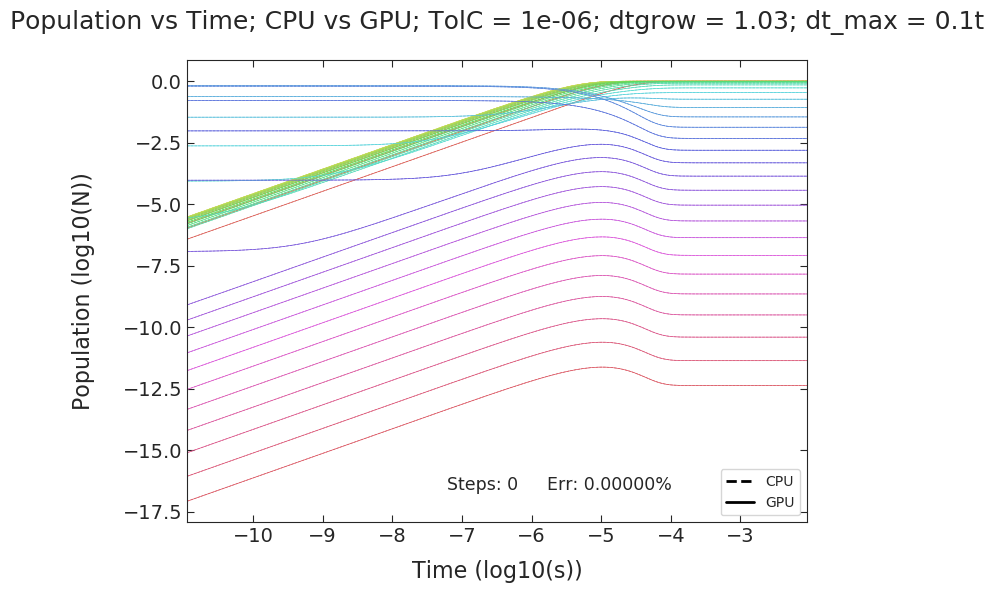

In [19]:

import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

n_plotfiles = 174 #Enter the number of plotfiles you have
scheme = "EA" #Enter the scheme you are testing
model_number = "3" #Enter the model you are using (1, 3, or 5)

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    tolC, dt_grow, dt_max, steps = None, None, None, None
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")

        with open(filename, "r") as f:
            if cpp:
                N = []
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("N:"):
                        N_line = line.split(": ")[1].strip()
                        N.append(np.array([float(x) for x in N_line.split()]))
                    elif i == num_files - 1:  # Only for last file
                        if line.startswith("tolC:"):
                            tolC = float(line.split(":")[1])
                        elif line.startswith("dt_grow:"):
                            dt_grow = float(line.split(":")[1])
                        elif line.startswith("dt_max:"):
                            dt_max = float(line.split(":")[1])
                        elif line.startswith("steps:"):
                            steps = int(line.split(":")[1])
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                N_index = lines.index("N\n") + 1
                N = []
                while True:
                    try:
                        N.append(float(lines[N_index].strip()))
                        N_index += 1
                    except ValueError:
                        break

        t_values.append(t)
        N_values.append(N)

    t_array = np.array(t_values)
    N_array = np.array(N_values)

    if not cpp:
        N_array = N_array.reshape(len(N_array), 1, -1)

    return t_array, N_array, tolC, dt_grow, dt_max, steps

# Load C++ data
file_dir_cpp1 = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/3_6_CPU"
t_array_cpp1, N_array_cpp1, tolC, dt_grow, dt_max, steps_cpp1 = load_data(file_dir_cpp1, "PlotFile_", n_plotfiles)

# Load Matlab data
file_dir_cpp2 = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/3_6_GPU"
t_array_cpp2, N_array_cpp2, tolC, dt_grow, dt_max, steps_cpp2 = load_data(file_dir_cpp2, "PlotFile_", n_plotfiles)

# Apply log10 to the arrays
t_log_array_cpp1 = np.log10(t_array_cpp1)
N_log_array_cpp1 = np.log10(N_array_cpp1)
t_log_array_cpp2 = np.log10(t_array_cpp2)
N_log_array_cpp2 = np.log10(N_array_cpp2)

# Initialize new interpolated C++ N_array
N_array_cpp1_interpolated = np.zeros(N_array_cpp2.shape)

# Interpolate the C++ N_array to match Matlab timesteps
for i in range(N_array_cpp1.shape[1]): 
    for j in range(N_array_cpp1.shape[2]):
        N_array_cpp1_interpolated[:, i, j] = np.interp(t_array_cpp2, t_array_cpp1, N_array_cpp1[:, i, j])

# Perform the RMS error calculation for each time step
RMS_array = np.zeros((n_plotfiles,))
for i in range(1, n_plotfiles):
    R = N_array_cpp2[i, :, :]
    A = N_array_cpp1_interpolated[i, :, :]

    Res = np.abs(A - R)
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))

    RMS_array[i] = RMS

# Set the equilibrium time in log10 scale
equilibrium_log_time = -1

# Convert to linear time scale
equilibrium_time = 10**equilibrium_log_time

# Find the index where time exceeds the equilibrium time
equilibrium_index = np.searchsorted(t_array_cpp2, equilibrium_time, side='right')

# Compute the time differences and total error up to the equilibrium time
t_diff = np.diff(t_array_cpp2[:equilibrium_index])
error = np.sum(RMS_array[1:equilibrium_index] * t_diff)

# Normalize by total time interval for the sum
total_time_interval = t_array_cpp2[equilibrium_index-1] - t_array_cpp2[0]
normalized_error = error / total_time_interval

# Convert to percentage
percent_error = normalized_error * 100

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the 'colors' variable using hls_palette
num_colors = N_log_array_cpp1.shape[2]
colors = sns.color_palette("hls", num_colors)


# Plot C++ data with dashed lines
for i in range(N_log_array_cpp1.shape[2]):
    ax.plot(t_log_array_cpp1[1:], N_log_array_cpp1[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2, linestyle='--')

# Plot Matlab data with straight lines
for i in range(N_log_array_cpp2.shape[2]):
    ax.plot(t_log_array_cpp2[1:], N_log_array_cpp2[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14, length=5, direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', length=2.5, direction='in', bottom=True, top=True, left=True, right=True)

# Add title
ax.set_title(f"Population vs Time; CPU vs GPU; TolC = {tolC}; dtgrow = {dt_grow}; dt_max = {dt_max}t", fontsize=18, y=1.05)

custom_lines = [Line2D([0], [0], color='black', lw=2, linestyle='--'),
                Line2D([0], [0], color='black', lw=2)]

ax.legend(custom_lines, ['CPU', 'GPU'], loc='lower right')

# Add text without box for steps and error inside plot to left of legend
ax.text(0.42, 0.1, f"Steps: {steps_cpp1}", transform=ax.transAxes, fontsize=12.5, verticalalignment='top')
ax.text(0.58, 0.1, f"Err: {percent_error:.5f}%", transform=ax.transAxes, fontsize=12.5, verticalalignment='top')

ax.margins(x=0.00)

# Save the figure
#plt.savefig("Pop_vs_time_GPUvsCPU_Model_3.eps", dpi=300, bbox_inches="tight")
plt.savefig(f"CPU_{scheme}_Model_{model_number}_Pop_vs_time_GPUvsCPU.", dpi=300, bbox_inches="tight")



/tmp/ipykernel_29017/3361865340.py:111: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


AttributeError: 'AxesSubplot' object has no attribute 'set_ylims'

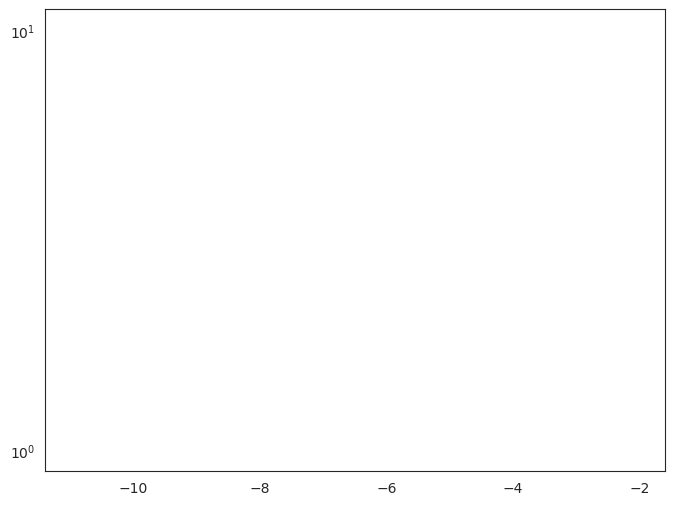

In [25]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_plotfiles = 174 #Enter the number of plotfiles you have
scheme = "EA" #Enter the scheme you are testing
model_number = "3" #Enter the model you are using (1, 3, or 5)

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    tolC, dt_grow, dt_max, steps = None, None, None, None
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")

        with open(filename, "r") as f:
            if cpp:
                N = []
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("N:"):
                        N_line = line.split(": ")[1].strip()
                        N.append(np.array([float(x) for x in N_line.split()]))
                    elif i == num_files - 1:  # Only for last file
                        if line.startswith("tolC:"):
                            tolC = float(line.split(":")[1])
                        elif line.startswith("dt_grow:"):
                            dt_grow = float(line.split(":")[1])
                        elif line.startswith("dt_max:"):
                            dt_max = float(line.split(":")[1])
                        elif line.startswith("steps:"):
                            steps = int(line.split(":")[1])
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                N_index = lines.index("N\n") + 1
                N = []
                while True:
                    try:
                        N.append(float(lines[N_index].strip()))
                        N_index += 1
                    except ValueError:
                        break

        t_values.append(t)
        N_values.append(N)

    t_array = np.array(t_values)
    N_array = np.array(N_values)

    if not cpp:
        N_array = N_array.reshape(len(N_array), 1, -1)

    return t_array, N_array, tolC, dt_grow, dt_max, steps

# Load C++ data
file_dir_cpp1 = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/3_6_CPU"
t_array_cpp1, N_array_cpp1, tolC, dt_grow, dt_max, steps_cpp1 = load_data(file_dir_cpp1, "PlotFile_", n_plotfiles)

# Load Matlab data
file_dir_cpp2 = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/3_6_GPU"
t_array_cpp2, N_array_cpp2, tolC, dt_grow, dt_max, steps_cpp2 = load_data(file_dir_cpp2, "PlotFile_", n_plotfiles)


N_array_cpp1_interpolated = np.zeros(N_array_cpp2.shape)

for i in range(N_array_cpp1.shape[1]): 
    for j in range(N_array_cpp1.shape[2]):
        N_array_cpp1_interpolated[:, i, j] = np.interp(t_array_cpp2, t_array_cpp1, N_array_cpp1[:, i, j])

RMS_array = np.zeros((n_plotfiles,))
for i in range(1, n_plotfiles):
    R = N_array_cpp2[i, :, :]
    A = N_array_cpp1_interpolated[i, :, :]
    Res = np.abs(A - R) 
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))
    RMS_array[i] = RMS

# Set the equilibrium time in log10 scale
equilibrium_log_time = -1

# Convert to linear time scale
equilibrium_time = 10**equilibrium_log_time

# Find the index where time exceeds the equilibrium time
equilibrium_index = np.searchsorted(t_array_cpp2, equilibrium_time, side='right')

# Compute the time differences and total error up to the equilibrium time
t_diff = np.diff(t_array_cpp2[:equilibrium_index])
error = np.sum(RMS_array[1:equilibrium_index] * t_diff)

# Normalize by total time interval for the sum
total_time_interval = t_array_cpp2[equilibrium_index-1] - t_array_cpp2[0]
normalized_error = error / total_time_interval

# Convert to percentage
percent_error = normalized_error * 100

t_log_array_cpp2 = np.log10(t_array_cpp2)

sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t_log_array_cpp2[1:], abs(RMS_array[1:]), c='blue')
#ax.set_yscale("log")
#ax.set_ylims([1e-12, 1.0])
ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("$\\bar R_0$", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14, length=5, direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', length=2.5, direction='in', bottom=True, top=True, left=True, right=True)


ax.set_title(f"$\\bar R_0$ vs Time; EA vs BE; TolC = {tolC}; dtgrow = {dt_grow}; dt_max = {dt_max}t", fontsize=18, y=1.05)


#plt.savefig("RMS_vs_time_GPUvsCPU_Model_3.eps", dpi=300, bbox_inches="tight")
#plt.savefig(f"GPUvsCPU_{scheme}_Model_{model_number}_Pop_vs_time.", dpi=300, bbox_inches="tight")

plt.show()

print(f'The percent error is {percent_error:.5f}%')

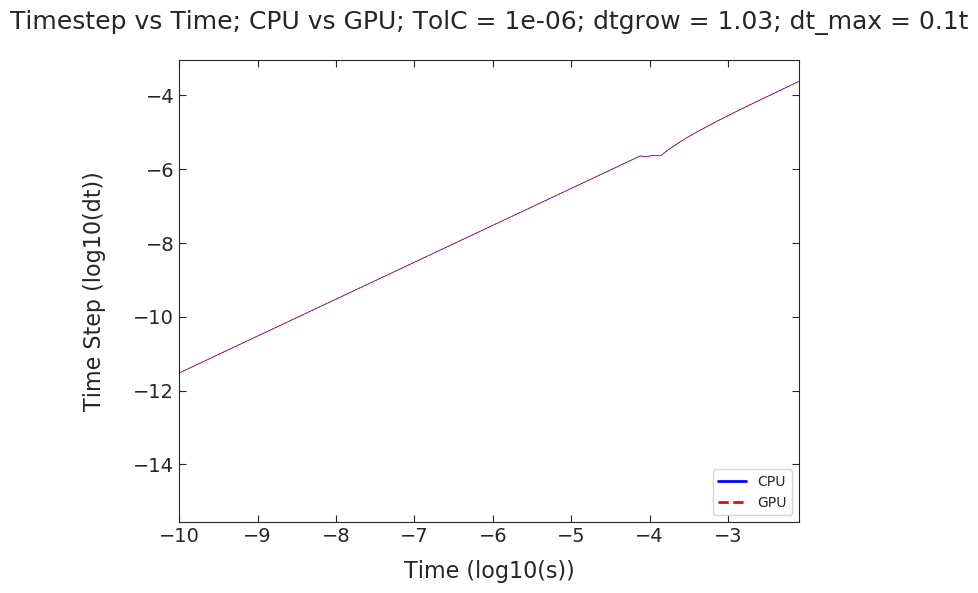

In [23]:
# Plotting and Graphics Package
# This package is designed to facilitate the visualization of data by creating plots of timestep versus time and population values.
# It provides the flexibility to customize various parameters such as plot file numbers and titles according to specific requirements.
import os
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

n_plotfiles = 174 #Enter the number of plotfiles you have
scheme = "EA" #Enter the scheme you are testing
model_number = "3" #Enter the model you are using (1, 3, or 5)

# Function to load data from files
def load_data(file_dir, num_files, cpp=True):
    t_values = []
    dt_values = []
    tolC, dt_grow, dt_max = None, None, None

    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")
        
        with open(filename, "r") as f:
            if cpp:
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("dt:"):
                        dt = float(line.split(": ")[1])
                    elif i == num_files - 1:  # Only for last file
                        if line.startswith("tolC:"):
                            tolC = float(line.split(":")[1])
                        elif line.startswith("dt_grow:"):
                            dt_grow = float(line.split(":")[1])
                        elif line.startswith("dt_max:"):
                            dt_max = float(line.split(":")[1])
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                dt_index = lines.index("dt\n") + 1
                dt = float(lines[dt_index].strip())
        
        t_values.append(t)
        dt_values.append(dt)
    
    t_array = np.array(t_values)
    dt_array = np.array(dt_values)
    
    return t_array, dt_array, tolC, dt_grow, dt_max

# Load C++ data
file_dir_cpp1 = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/3_6_CPU"
t_array_cpp1, dt_array_cpp1, tolC, dt_grow, dt_max = load_data(file_dir_cpp1, 173)

# Load Matlab data
file_dir_cpp2 = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/3_6_GPU"
t_array_cpp2, dt_array_cpp2, tolC, dt_grow, dt_max = load_data(file_dir_cpp2, 173)

# Apply log10 to the arrays
t_log_array_cpp1 = np.log10(t_array_cpp1)
dt_log_array_cpp1 = np.log10(dt_array_cpp1)
t_log_array_cpp2 = np.log10(t_array_cpp2)
dt_log_array_cpp2 = np.log10(dt_array_cpp2)

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Plot C++ data with straight lines
ax.plot(t_log_array_cpp1, dt_log_array_cpp1, c='blue', alpha=0.98, linewidth=0.5, zorder=2)

# Plot Matlab data with dashed lines
ax.plot(t_log_array_cpp2, dt_log_array_cpp2, c='red', alpha=0.98, linewidth=0.5, zorder=2, linestyle='--')

ax.set_xlim([-10, max(t_log_array_cpp1.max(), t_log_array_cpp2.max())])

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Time Step (log10(dt))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14, length=5, direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', length=2.5, direction='in', bottom=True, top=True, left=True, right=True)

# Add title

ax.set_title(f"Timestep vs Time; CPU vs GPU; TolC = {tolC}; dtgrow = {dt_grow}; dt_max = {dt_max}t", fontsize=18, y=1.05)


# Create a custom legend with visual distinctions
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='red', lw=2, linestyle='--')]

ax.legend(custom_lines, ['CPU', 'GPU'], loc='lower right')

#plt.savefig("Timestep_vs_time_GPUvsCPU_Model_3.eps", dpi=300, bbox_inches="tight")
plt.savefig(f"GPUvsCPU_{scheme}_Model_{model_number}_Timestep_vs_time.", dpi=300, bbox_inches="tight")

plt.show()


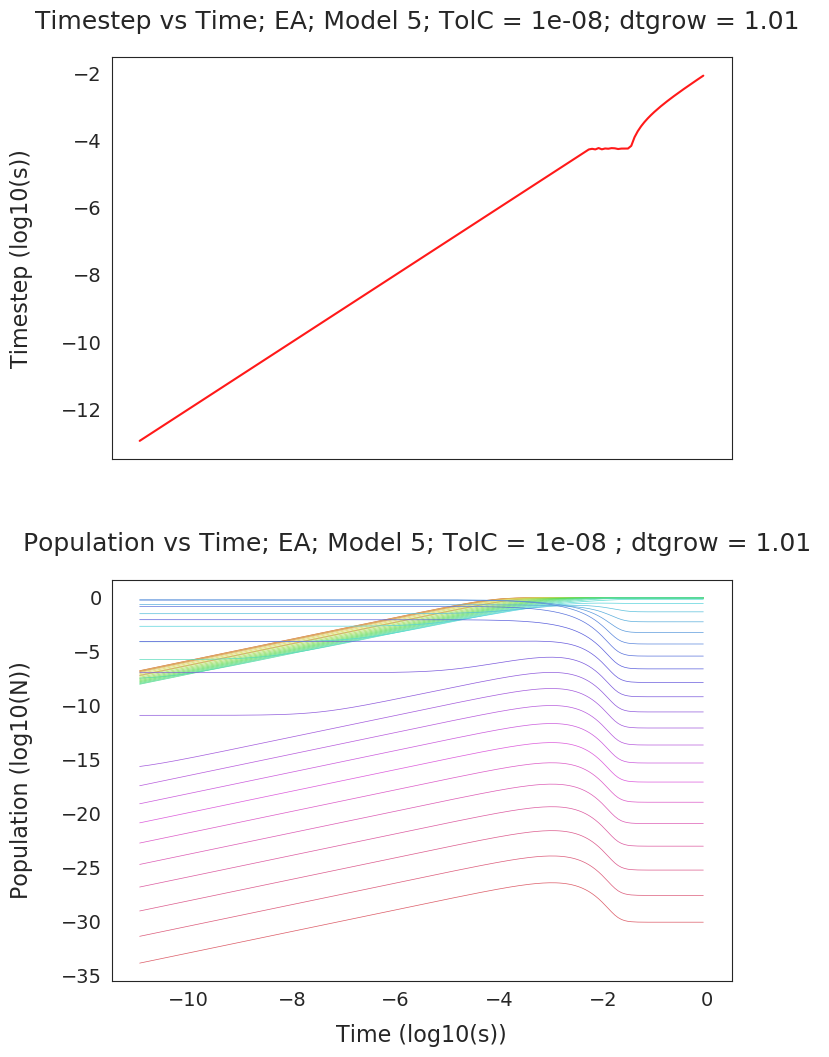

In [22]:
# Plotting and Graphics Package
# This package is designed to facilitate the visualization of data by creating plots of timestep versus time and population values.
# It provides the flexibility to customize various parameters such as plot file numbers and titles according to specific requirements.
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter

#Parameters
n_plotfiles = 174 #Enter the number of plotfiles you have
scheme = "EA" #Enter the scheme you are testing
model_number = "5" #Enter the model you are using (1, 3, or 5)



# Set the directory where the plotfiles are located
file_dir = "/home/jared/NeutrinoTransportTesting/PROJECT_DATA/5_8_GPU"

# Initialize empty lists to store the t and dt values, N values
t_values = []
dt_values = []
N_values = []

# Loop over each plotfile, change based on nplotfiles
for i in range(n_plotfiles):
    # Construct the filename
    filename = os.path.join(file_dir, f"PlotFile_{i}")
    # Open the file and extract the dt, t, and N values
    with open(filename, "r") as f:
        N = []
        for line in f:
            if line.startswith("t:"):
                t = float(line.split(":")[1])
            if line.startswith("tolC:"):            
                tolC = float(line.split(":")[1])
            if line.startswith("dt_grow:"):          
                dt_grow = float(line.split(":")[1])    
            elif line.startswith("dt:"):
                dt = float(line.split(": ")[1])
            elif line.startswith("N:"):
                N_line = line.split(": ")[1].strip()
                N.append(np.array([float(x) for x in N_line.split()]))
                
    # Append the t, dt, and N values to the lists
    t_values.append(t)
    dt_values.append(dt)
    N_values.append(N)
    
# Convert the lists to NumPy arrays
t_array = np.array(t_values)
dt_array = np.array(dt_values)
N_array = np.array(N_values)

# Apply log10 to the relevant arrays
t_log_array = np.log10(t_array)
dt_log_array = np.log10(dt_array)
N_log_array = np.log10(N_array)

# Set up the subplots sharing the same x-axis
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12), sharex=True)

# Plot dt vs t on the first subplot
ax1.plot(t_log_array[1:], dt_log_array[1:], c="red", alpha=0.9, linewidth=1.5, zorder=2)
ax1.set_ylabel("Timestep (log10(s))", fontsize=16, labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Plot N vs t on the second subplot
palette = sns.color_palette("hls", n_colors=N_log_array.shape[2])
colors = list(palette.as_hex())
for i in range(N_log_array.shape[2]):
    ax2.plot(t_log_array[1:], N_log_array[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)
ax2.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax2.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Add titles
ax1.set_title(f"Timestep vs Time; {scheme}; Model {model_number}; TolC = {tolC}; dtgrow = {dt_grow} ", fontsize=18, y=1.05)
ax2.set_title(f"Population vs Time; {scheme}; Model {model_number}; TolC = {tolC} ; dtgrow = {dt_grow} ", fontsize=18, y=1.05)

# Adjust the space between the subplots
fig.subplots_adjust(hspace=0.3)

# Save the plot to a file
plt.savefig(f"GPU_{scheme}_Model_{model_number}_TimestepVS.Time_&_PopVS.Time.", dpi=300, bbox_inches="tight")

plt.show()